In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.3/488.3 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 4.8 MB/s eta 0:00:00


In [2]:
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1-jjS8XshisM8dXv1lmPZDL_NvTR9PHT6' -O 'video_1.mp4'

--2023-04-01 16:46:48--  https://drive.google.com/uc?export=download&id=1-jjS8XshisM8dXv1lmPZDL_NvTR9PHT6
Resolving drive.google.com (drive.google.com)... 142.250.128.102, 142.250.128.113, 142.250.128.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dt6qdna1bcpve9f7echu1sjd0f5t25do/1680367575000/16610709710453750008/*/1-jjS8XshisM8dXv1lmPZDL_NvTR9PHT6?e=download&uuid=3ab7805d-f8c2-4ff0-8c23-2213d289afd4 [following]
--2023-04-01 16:46:49--  https://doc-00-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dt6qdna1bcpve9f7echu1sjd0f5t25do/1680367575000/16610709710453750008/*/1-jjS8XshisM8dXv1lmPZDL_NvTR9PHT6?e=download&uuid=3ab7805d-f8c2-4ff0-8c23-2213d289afd4
Resolving doc-00-2k-docs.googleusercontent.com (doc-00-2k-docs.googleusercontent.com)... 142.250.136.132, 

In [4]:
model = YOLO('yolov8n.pt')
file_path = "video_1.mp4"
capture = cv2.VideoCapture(file_path)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

In [5]:
#Retrive the first frame
success, first_frame = capture.read()
print(success)
print('Frame size: ', first_frame.shape)

True
Frame size:  (480, 854, 3)


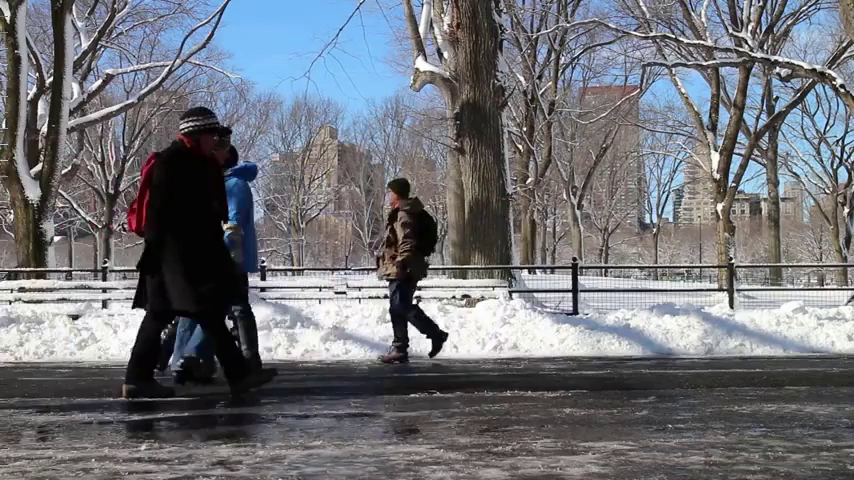

In [6]:
cv2_imshow(first_frame)

In [7]:
#Retrive the ith frame
i=50
capture.set(1, i)
success, ith_frame = capture.read()
print(success)

True


In [8]:
results = model(ith_frame)


0: 384x640 3 persons, 1 dog, 1 backpack, 677.4ms
Speed: 6.0ms preprocess, 677.4ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)


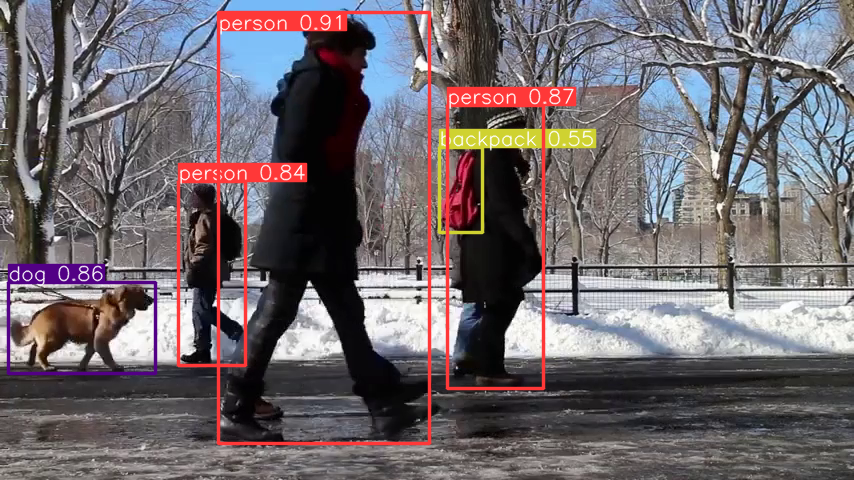

In [9]:
annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)

In [10]:
r = results[0]

In [11]:
print('Objects that YOLOv8 can identify')
print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in r.names.items()) + "}")

Objects that YOLOv8 can identify
{0: 'person',
1: 'bicycle',
2: 'car',
3: 'motorcycle',
4: 'airplane',
5: 'bus',
6: 'train',
7: 'truck',
8: 'boat',
9: 'traffic light',
10: 'fire hydrant',
11: 'stop sign',
12: 'parking meter',
13: 'bench',
14: 'bird',
15: 'cat',
16: 'dog',
17: 'horse',
18: 'sheep',
19: 'cow',
20: 'elephant',
21: 'bear',
22: 'zebra',
23: 'giraffe',
24: 'backpack',
25: 'umbrella',
26: 'handbag',
27: 'tie',
28: 'suitcase',
29: 'frisbee',
30: 'skis',
31: 'snowboard',
32: 'sports ball',
33: 'kite',
34: 'baseball bat',
35: 'baseball glove',
36: 'skateboard',
37: 'surfboard',
38: 'tennis racket',
39: 'bottle',
40: 'wine glass',
41: 'cup',
42: 'fork',
43: 'knife',
44: 'spoon',
45: 'bowl',
46: 'banana',
47: 'apple',
48: 'sandwich',
49: 'orange',
50: 'broccoli',
51: 'carrot',
52: 'hot dog',
53: 'pizza',
54: 'donut',
55: 'cake',
56: 'chair',
57: 'couch',
58: 'potted plant',
59: 'bed',
60: 'dining table',
61: 'toilet',
62: 'tv',
63: 'laptop',
64: 'mouse',
65: 'remote',
66: 'keyboar

In [12]:
print('Number of objects found: ', len(r.boxes))
print('Class of each object: ', [r.names[cls.item()] for cls in r.boxes.cls])

Number of objects found:  5
Class of each object:  ['person', 'person', 'dog', 'person', 'backpack']


### Testing YOLO for movie-like video

In [13]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=12mE6rYmUxkfDeLwIU3l7ESVn8wioRtTn' -O 'video_2.mp4'

--2023-04-01 16:46:55--  https://drive.google.com/uc?export=download&id=12mE6rYmUxkfDeLwIU3l7ESVn8wioRtTn
Resolving drive.google.com (drive.google.com)... 142.250.128.102, 142.250.128.113, 142.250.128.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kkmm4ui486vsq8kaq3m7bt3i4jj6nifo/1680367575000/16610709710453750008/*/12mE6rYmUxkfDeLwIU3l7ESVn8wioRtTn?e=download&uuid=114df103-b889-4c55-b531-4f2a64dd3b28 [following]
--2023-04-01 16:46:57--  https://doc-04-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kkmm4ui486vsq8kaq3m7bt3i4jj6nifo/1680367575000/16610709710453750008/*/12mE6rYmUxkfDeLwIU3l7ESVn8wioRtTn?e=download&uuid=114df103-b889-4c55-b531-4f2a64dd3b28
Resolving doc-04-2k-docs.googleusercontent.com (doc-04-2k-docs.googleusercontent.com)... 142.250.136.132, 

In [14]:
model = YOLO('yolov8n.pt')
file_path = "video_2.mp4"
capture = cv2.VideoCapture(file_path)

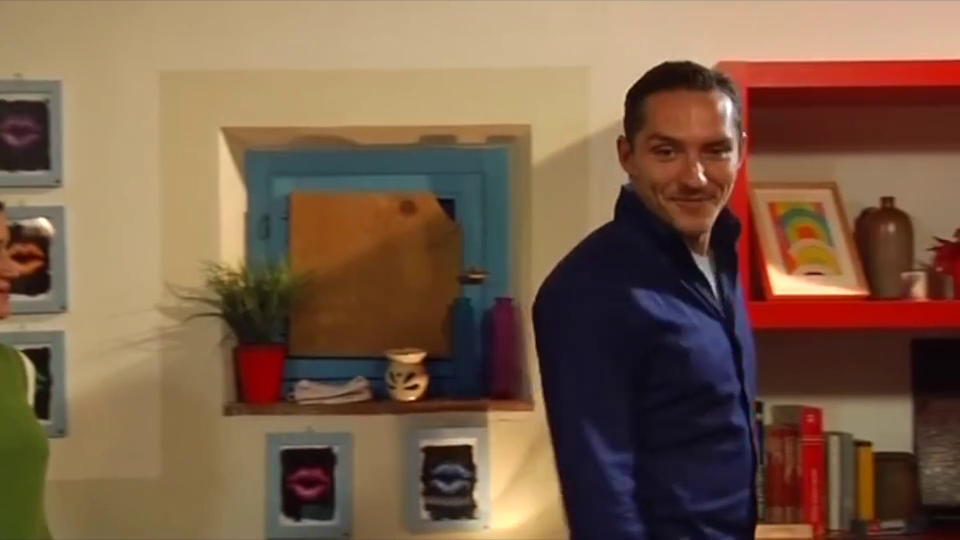

In [15]:
#Retrive the ith frame
i=220
capture.set(1, i)
success, ith_frame = capture.read()
cv2_imshow(ith_frame)


0: 384x640 1 person, 1 bottle, 1 potted plant, 1 book, 443.7ms
Speed: 0.9ms preprocess, 443.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


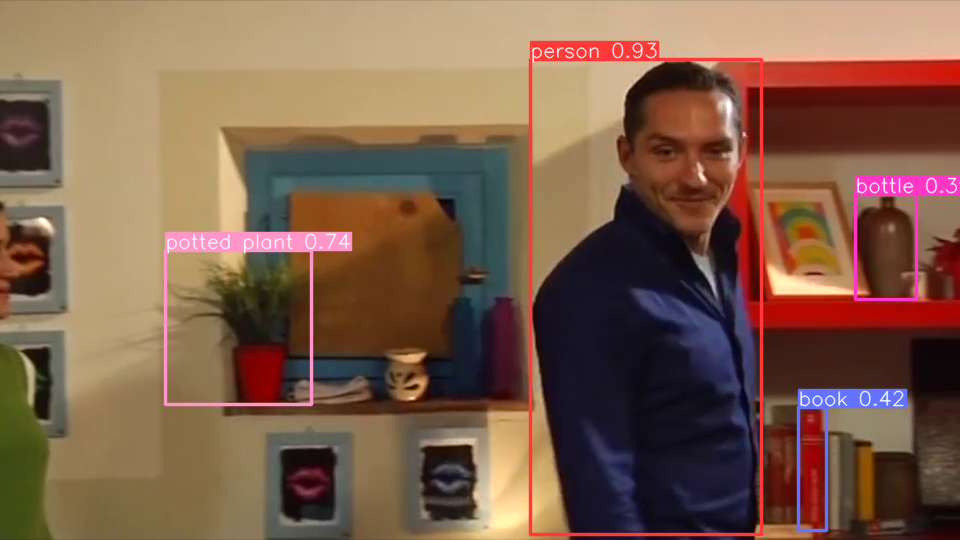

In [16]:
results = model(ith_frame)
annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)

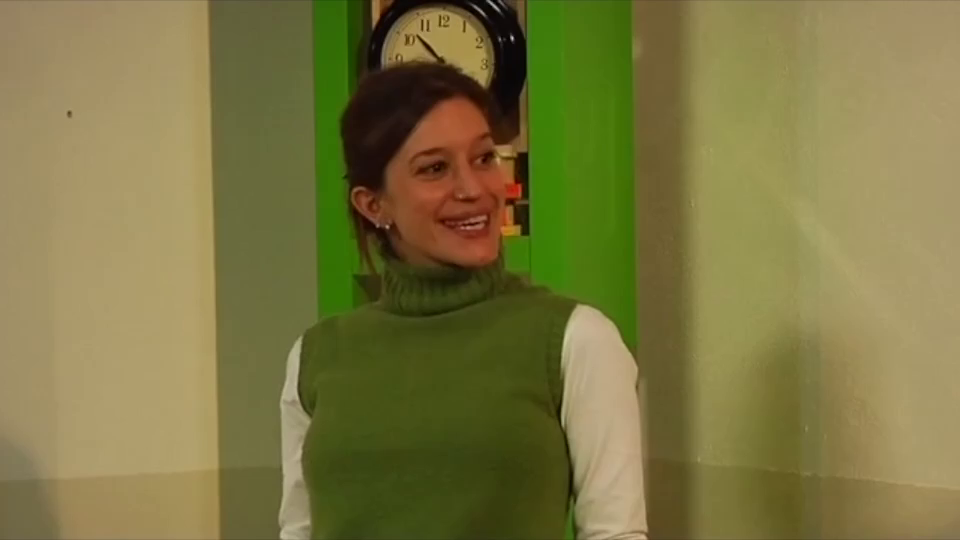

In [17]:
#Retrive the ith frame
i=300
capture.set(1, i)
success, ith_frame = capture.read()
cv2_imshow(ith_frame)


0: 384x640 1 person, 1 clock, 425.8ms
Speed: 17.6ms preprocess, 425.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


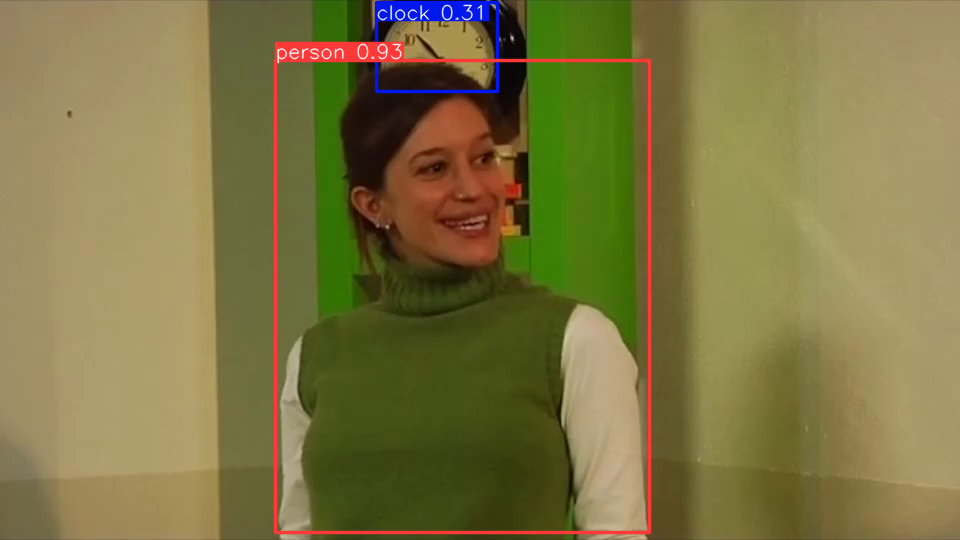

In [18]:
results = model(ith_frame)
annotated_frame = results[0].plot()
cv2_imshow(annotated_frame)